In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
_ = sns.set_style('darkgrid')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# digits = load_digits()
digits = fetch_openml('mnist_784', version=1)

In [4]:
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

In [5]:
digits_df['Target'] = digits.target

In [6]:
digits_df.shape

(70000, 785)

In [7]:
digits_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [8]:
digits_df.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
69999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [9]:
digits_df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Target      0
Length: 785, dtype: int64

In [10]:
X = np.array(digits_df.drop(columns="Target"))
y = np.array(digits_df['Target'])

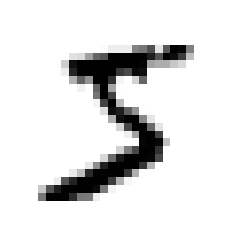

In [212]:
some_digit = X[0]
dig_img = some_digit.reshape(28,28)
plt.imshow(dig_img, cmap='binary')
plt.axis('off')
plt.show()

In [12]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

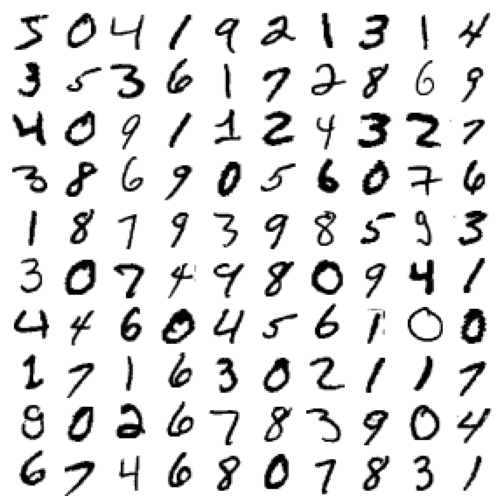

In [13]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [14]:
#Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [16]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

## Binary Classification

##### Building a 5-Detector

In [17]:
#Training a Binary Classifier ==> Stochastic Gradient Descent (SGD) Classifier
#Let's simplify the problem for now and only try to identify one digit - for example the number 8
#Let's create the target vectors for this classification task
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
len(y_train_5)

60000

##### Implenting SGDClassifier

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

##### Model Evaluation

In [22]:
# Score Check
sgd_clf.score(X_test, y_test_5)

0.9492

In [23]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [25]:
# Cross Validation Predictions
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
y_train_perfect_predictions = y_train_5

In [30]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [31]:
# Compute Classifier Metrics
from sklearn.metrics import precision_score, recall_score

In [32]:
# It tells us what proportion of predictions which are predicted as positives that are
# actual positives to the total predicted positives
precision_score(y_train_5, y_train_pred) # 3530/(3530+687) 

0.8370879772350012

In [33]:
# It tells us what proportion of predictions which are predicted as positives that are
# actual positives to the total positives in the original dataset
recall_score(y_train_5, y_train_pred) #3530/(3530+1891)

0.6511713705958311

In [34]:
# F1 Score
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [36]:
# Precision/Recall Trade-off - For each instance of SGDClassifier, it computes a score based on a decision function. If that
# score is greater than a threshold, it assigns the instance to the positive class;
# otherwise it assigns it to the negative class.

In [37]:
# SKLearn does not let you set the threshold directly, but it does give you access to the decision scores
# that it uses to make predictions.
# Instead of calling the classifier's predict method, you can call its decision_function() methos, which returns a
# score for each instance, and then use any threshold you want to make predictions based on these scores.

In [38]:
y_scores = sgd_clf.decision_function([some_digit])

In [39]:
y_scores

array([2164.22030239])

In [40]:
# Let's set threshold = 0 and then raise it
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [41]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [42]:
# This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it
# when the threshold is 0, but it misses when threshold increased to 6000

In [43]:
# How to decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in 
# the training set, but this time we need to specify that we need decision scores instead of predictions.

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [45]:
# With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds;

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
print('Precisions: {}'.format(precisions),'\n')
print('Recalls: {}'.format(recalls),'\n')
print('Thresholds: {}'.format(thresholds),'\n')

Precisions: [0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ] 

Recalls: [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00] 

Thresholds: [-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905] 



In [49]:
# Finally, will use Matplotlib to plot precision and recall as functions of the threshold value

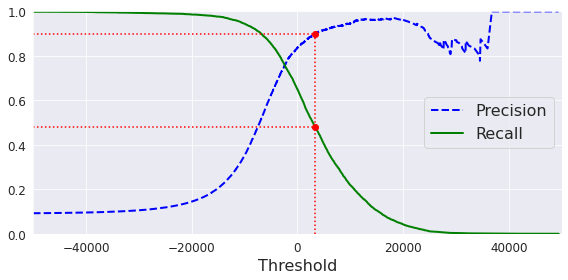

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                            
plt.tight_layout()
plt.show()

In [51]:
(y_train_pred == (y_scores > 0)).all()

True

In [52]:
# Another way to select a good precision/recall trade-off is to plot Precision directly against Recall.

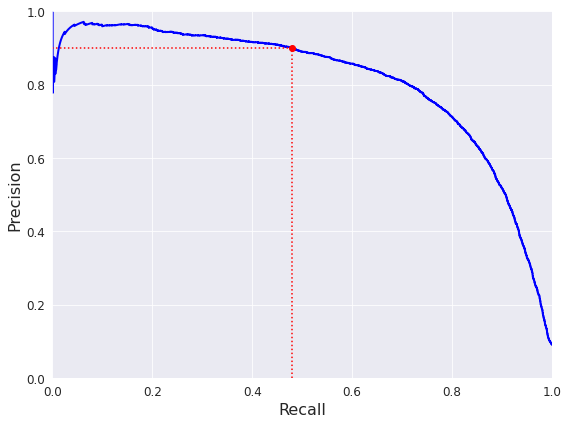

In [53]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.tight_layout()
plt.show()

In [54]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [55]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [56]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [57]:
# The ROC Curve
# The ROC curve plots the true positive rate against the false positive rate.
# The FPR is the ratioof negative instances that are correctly classified as positive. It is equal to 1 - the true negative
# rate (TNR), which is the ration of negative instances that are correctly classified as negative.
# The TNR is also call specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 - specificity.

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

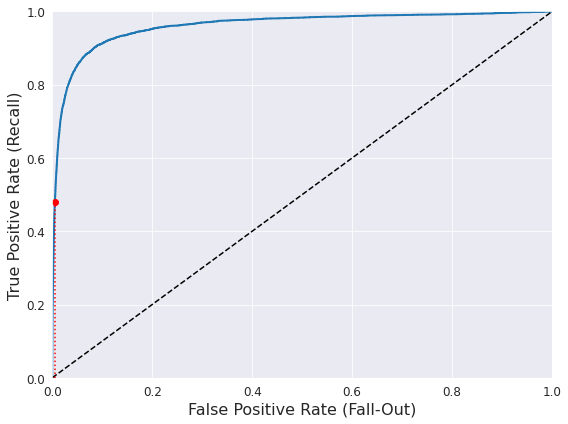

In [60]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
# save_fig("roc_curve_plot")                                    
plt.tight_layout()
plt.show()

In [61]:
# Once again there is a trade-off; the higher the recall (TPR), the more false positive (FPR) the classifier produces. 
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as 
# possible (toward the top-left vorner)

In [62]:
# One way to compare the classifiers is to measure the area under the curve (AUC). A perfect classifier will have 
# ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [65]:
# Let's now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier.

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
forest_clf = RandomForestClassifier()

In [68]:
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, method='predict_proba', cv=3)

In [69]:
y_score_forest = y_proba_forest[:,1]

In [70]:
roc_auc_score(y_train_5, y_score_forest)

0.9983436731328145

In [71]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5,  cv=3)

In [72]:
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [73]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## Multiclass Classification

### OvO Strategy

In [74]:
from sklearn.svm import SVC

In [75]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.predict([some_digit])

array([5], dtype=int8)

In [76]:
svc_scores = svc_clf.decision_function([some_digit])
svc_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [78]:
display(svc_clf.classes_)
display(svc_clf.classes_[np.argmax(svc_scores)])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

5

In [79]:
svc_clf.score(X_test, y_test)

0.9792

### OvR Strategy

In [80]:
from sklearn.multiclass import OneVsRestClassifier

In [81]:
ovr_clf = OneVsRestClassifier(SVC())

In [82]:
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=int8)

In [83]:
ovr_clf_scores = ovr_clf.decision_function([some_digit])
ovr_clf_scores

array([[-2.20788779, -2.52734154, -1.42209483, -0.89545795, -3.66438164,
         1.09884347, -3.13930844, -2.05006487, -2.51601851, -3.39312853]])

In [87]:
ovr_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [88]:
ovr_clf.classes_[np.argmax(ovr_clf_scores)]

5

In [89]:
ovr_clf.score(X_test, y_test)

0.98

### SGDClassifier

In [92]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [214]:
sgd_clf.predict([some_digit])

array([3], dtype=int8)

In [95]:
sgd_clf.score(X_train, y_train)

0.8807666666666667

In [216]:
sgd_clf.score(X_test, y_test)

0.874

In [215]:
pred_sgd = sgd_clf.predict(X_test[5:15])
print('Predicted Labels: {}'.format(pred_sgd))
print('True Labels: {}'.format(y_test[5:15]))

Predicted Labels: [1 5 1 6 9 0 6 9 0 1]
True Labels: [1 4 9 5 9 0 6 9 0 1]


<P><b>SGDClassifier Scoring 88% on training & test sets.</b> Let's try another model, RandomForestClassifier.</p>

### RandomForestClassifier

In [217]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [213]:
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [175]:
forest_clf.score(X_train, y_train)

1.0

In [196]:
# making predictions on entire dataset
predictions = forest_clf.predict(X_test)

In [197]:
forest_clf.score(X_test, y_test)

0.9688

In [218]:
pred = forest_clf.predict(X_test[5:15])
print('Predicted Labels: {}'.format(pred))
print('True Labels: {}'.format(y_test[5:15]))

Predicted Labels: [1 4 9 5 9 0 6 9 0 1]
True Labels: [1 4 9 5 9 0 6 9 0 1]


##### Displaying the misclassified images with predicted labels(MNIST)

In [220]:
index=0
misclassified_img = []
for label, predict in zip(y_test, predictions):
  if label != predict:
    misclassified_img.append(index)
  index += 1

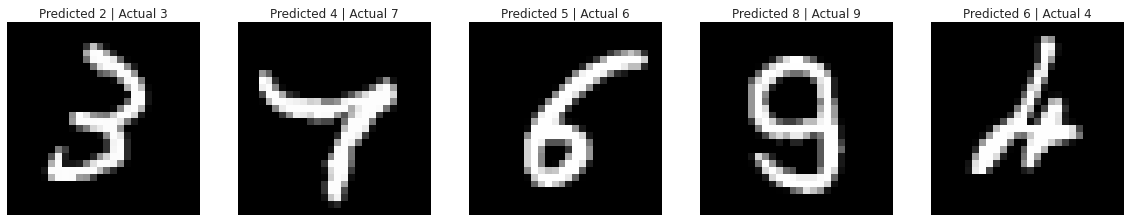

In [219]:
plt.figure(figsize=(20,4))
for plotindex,misindex in enumerate(misclassified_img[0:5]):
  plt.subplot(1, 5, plotindex+1)
  plt.imshow(np.reshape(X_test[misindex], (28,28)), cmap=plt.cm.gray)
  plt.axis('off')  
  plt.title(f"Predicted {predictions[misindex]} | Actual {y_test[misindex]}")
  plt.savefig('Image')  

<p><b>More than 95% of accuracy on both training & test sets.</b>